In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate

In [3]:

df_data1=pd.read_table('crystal_data_1.000000.txt',sep=" ",skiprows=4)
df_data2=pd.read_table('crystal_data_2.000000.txt',sep=" ",skiprows=4)
df_data3=pd.read_table('crystal_data_3.000000.txt',sep=" ",skiprows=4)
df_data4=pd.read_table('crystal_data_4.000000.txt',sep=" ",skiprows=4)
df_data5=pd.read_table('crystal_data_5.000000.txt',sep=" ",skiprows=4)
df_data6=pd.read_table('crystal_data_6.000000.txt',sep=" ",skiprows=4)
df_data7=pd.read_table('crystal_data_7.000000.txt',sep=" ",skiprows=4)
df_data8=pd.read_table('crystal_data_8.000000.txt',sep=" ",skiprows=4)
df=[df_data1,df_data2,df_data3,df_data4,df_data5,df_data6,df_data7,df_data8]
df_data1.head()

/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  
/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.
/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead.
  """
/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead.
  
/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: Futur

,Generation,x,y,theta,psi,phi,lattice_sum,fitness
0,0,0.756631,0.913528,1.184900,2.369550,1.433680,0.101417,0.000000e+00
1,0,0.261342,0.553652,0.399541,2.867270,0.863043,2.699420,1.260360e-20
2,0,0.820213,0.551644,1.285720,0.798336,0.859860,0.163554,1.593320e-01
3,0,0.856702,0.473568,1.343580,1.725640,0.736058,0.173890,1.331810e-01
4,0,0.107770,0.563055,0.156029,2.571250,0.877953,7.105500,8.149110e-54


In [4]:
#split in Generations
runs=[]
for j,df_data in enumerate(df):
    count=0
    before=0
    generations=[]
    for i,gen in enumerate(df_data["Generation"]):
        if gen!=count:
            generations.append(df_data.iloc[before:i-1,:])
            before=i-1
            count+=1
    runs.append(generations)


In [5]:
print(runs[6][49]['fitness'].max())

1.64795


In [6]:
#find fittest per Generation
best_x=[]
best_y=[]
fit_master=[]
for generations in runs:
    fitest=[]
    best_sol_x=[]
    best_sol_y=[]
    for i,gen in enumerate(generations):
        fitest.append(generations[i]['fitness'].max())
        for j,ele in enumerate(generations[i]['fitness']):
            if (generations[i]['fitness'].iloc[j]==fitest[i]):
                best_sol_x.append(generations[i]['x'].iloc[j])
                best_sol_y.append(generations[i]['y'].iloc[j])
                #hier können weitere Parameter der fittesten Werte gefiltert werden.
    best_x.append(best_sol_x)
    best_y.append(best_sol_y)
    fit_master.append(fitest)

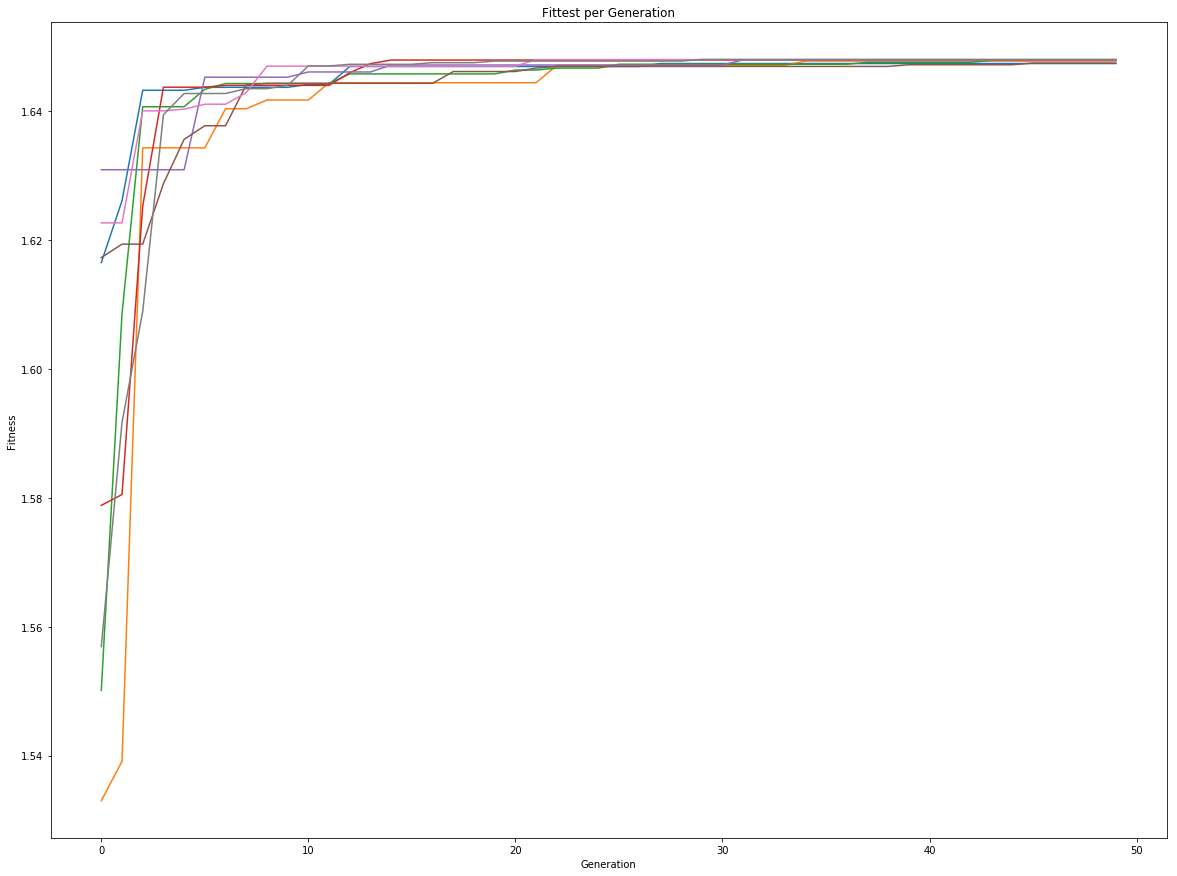

In [7]:
plt.figure(figsize=(20,15))
for fitest in fit_master:
    plt.plot(fitest)
#plt.yscale('log')
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.title('Fittest per Generation')
plt.savefig('Fittest_crystal.png')

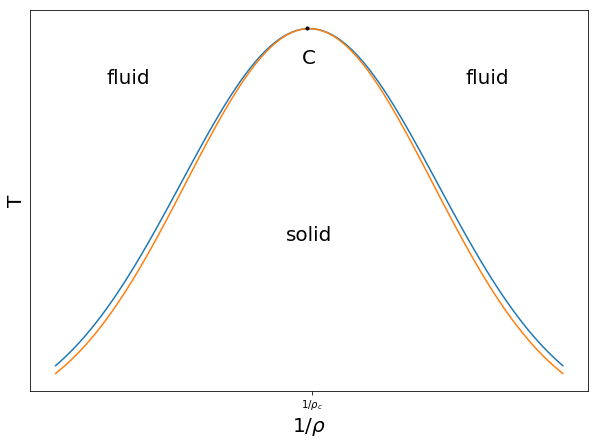

In [8]:
x=np.linspace(-1.4,1.4,100);
x1=np.linspace(-1.3,1.3,100)
y1=np.exp(-(x1**2/0.8))-0.36
y=np.exp(-(x**2))-0.36
fig=plt.figure(figsize=(10,7))
plt.plot(y)
plt.plot(y1,label='fluid phase')
plt.ylabel('T',fontsize=20)
plt.xlabel(r'$1/\rho$',fontsize=20)
plt.title('')
plt.xticks([50],[r'$1/\rho_c$'])
plt.yticks([],[])
plt.text(10,0.5,'fluid',fontsize=20)
plt.text(80,0.5,'fluid',fontsize=20)
plt.text(45,0.1,'solid',fontsize=20)
plt.text(48,0.55,'C',fontsize=20)
plt.plot(49,np.exp(-(0.665**2)),'.',c='black')
plt.savefig('Trho.png')

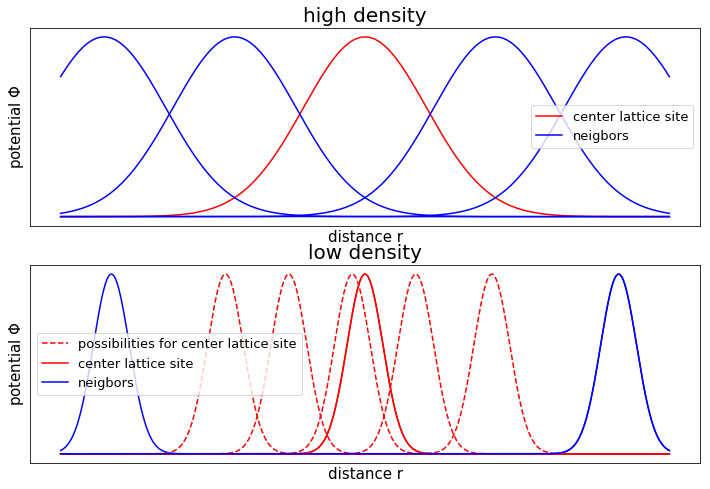

In [12]:

#-----subplot1---------
x=np.linspace(-12,12,10000)
y=np.exp(-(x**2))
y1=np.exp(-((x-10)**2))
y2=np.exp(-((x+10)**2))
y3=np.exp(-((x-2)**2))
y4=np.exp(-((x+3)**2))
y5=np.exp(-((x-5)**2))
y6=np.exp(-((x+5.5)**2))
y7=np.exp(-((x+0.5)**2))
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,2)
plt.plot(y,c='r')
plt.plot(y1,c='b')
plt.plot(y2,c='b')
plt.plot(y3,c='r',linestyle="--",label='possibilities for center lattice site')
plt.plot(y4,c='r',linestyle="--")
plt.plot(y5,c='r',linestyle="--")
plt.plot(y6,c='r',linestyle="--")
plt.plot(y7,c='r',linestyle="--")
plt.xticks([],[])
plt.yticks([],[])
plt.ylabel(r'potential $\Phi$',fontsize=15)
plt.xlabel(r'distance r',fontsize=15)
plt.plot(y,c='r',label='center lattice site')
plt.plot(y1,c='b',label='neigbors')
plt.title("low density",fontsize=20)
plt.legend(fontsize=13)
#-----subplot2---------
x=np.linspace(-3.5,3.5,10000)
plt.subplot(2,1,1)
y=np.exp(-(x**2))
y1=np.exp(-((x-1.5)**2))
y2=np.exp(-((x+1.5)**2))
y3=np.exp(-((x-3)**2))
y4=np.exp(-((x+3)**2))
plt.plot(y,c='r',label='center lattice site')
plt.plot(y1,c='b',label='neigbors')
plt.plot(y2,c='b')
plt.plot(y3,c='b')
plt.plot(y4,c='b')
plt.title("high density",fontsize=20)
plt.xticks([],[])
plt.yticks([],[])
plt.ylabel(r'potential $\Phi$',fontsize=15)
plt.xlabel(r'distance r',fontsize=15)
plt.legend(fontsize=13)
plt.savefig('potential.png')